Name : Keval Shah

Sap : 60009220061

ML Lab_1


In [2]:
!ls

foodtruck.txt  Housing.csv  sample_data


Using foodtruck dataset

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,8)

In [5]:
data = pd.read_csv('foodtruck.txt')
data.head(5)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [7]:
data.isna().sum()

Population    0
Profit        0
dtype: int64

In [8]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'Population Vs Profit')

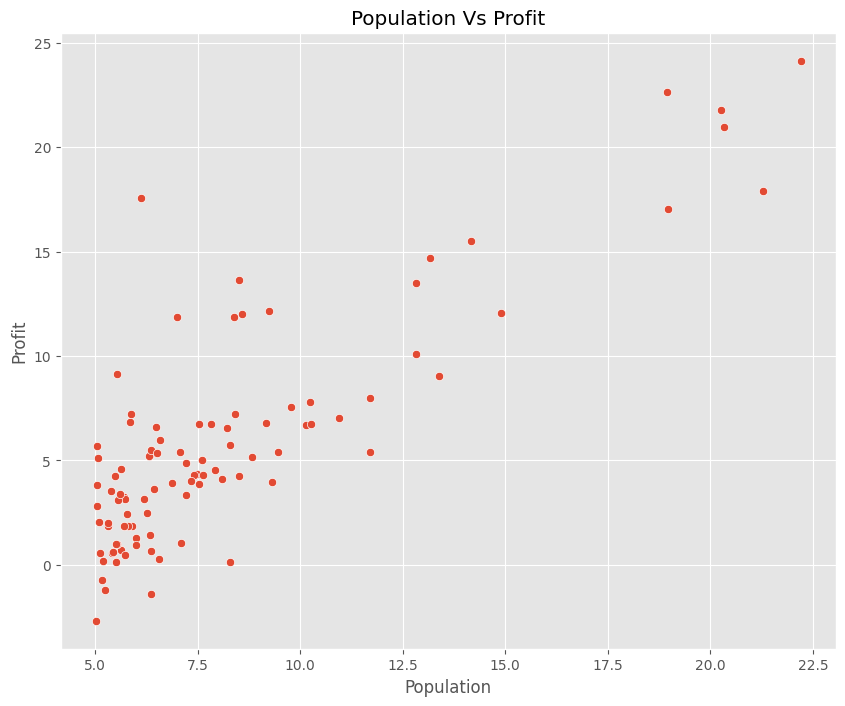

In [9]:
ax = sns.scatterplot(x = "Population", y = "Profit", data = data)
ax.set_title("Population Vs Profit")

Cost function

In [10]:
def cost_function(X, y, theta):
  m = len(y)
  y_pred = X.dot(theta)
  error = (y_pred - y) ** 2

  return 1/ (2*m) * np.sum(error)


In [11]:
m = data.Population.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y = data.Profit.values.reshape (m, 1)
theta = np.zeros((2, 1))

cost_function (X, y, theta)


32.072733877455676

Gradient descent function

In [15]:
def gradient_descent(X, y, theta, alpha, iterations):
  m = len(y)
  cost =[]
  for i in range(iterations):
    y_pred = X.dot(theta)
    error = np.dot(X.transpose(), (y_pred - y))
    theta -= alpha * 1/m *error
    cost.append(cost_function(X, y, theta))
  return theta, cost

In [16]:
theta, cost = gradient_descent(X, y, theta, alpha =0.01, iterations=1000)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0], 2))))

h(x) = -3.24 + 1.13x1


In [17]:
from mpl_toolkits.mplot3d import Axes3D

In [21]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i], theta_1[j]])

    cost_values[i,j] = cost_function(X,y,t)

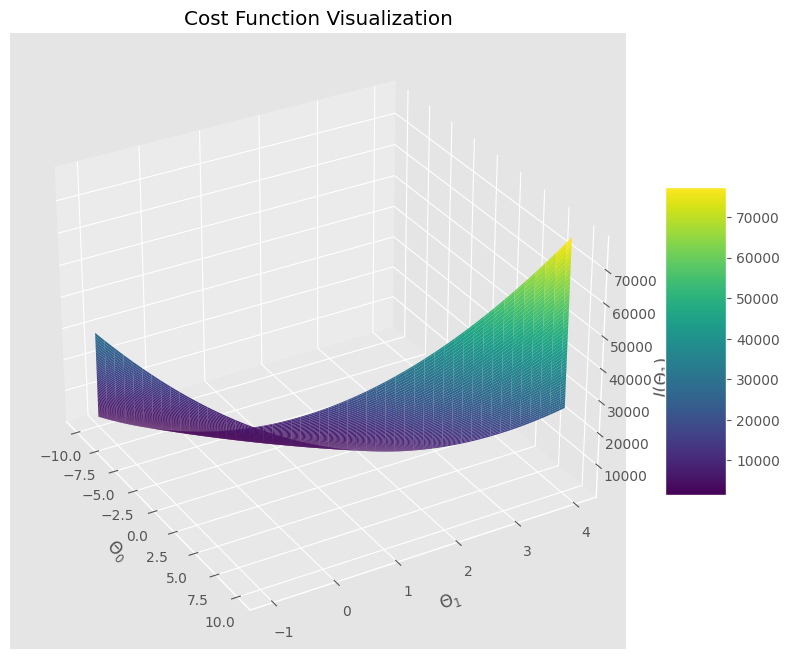

In [33]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel("$\\Theta_0$")
plt.ylabel("$\\Theta_1$")
ax.set_zlabel("$J(\\Theta_1)$")
ax.view_init(30, 330)
plt.title("Cost Function Visualization")
plt.show()


Text(0.5, 1.0, 'Values of cost function over iterations of gradient descent')

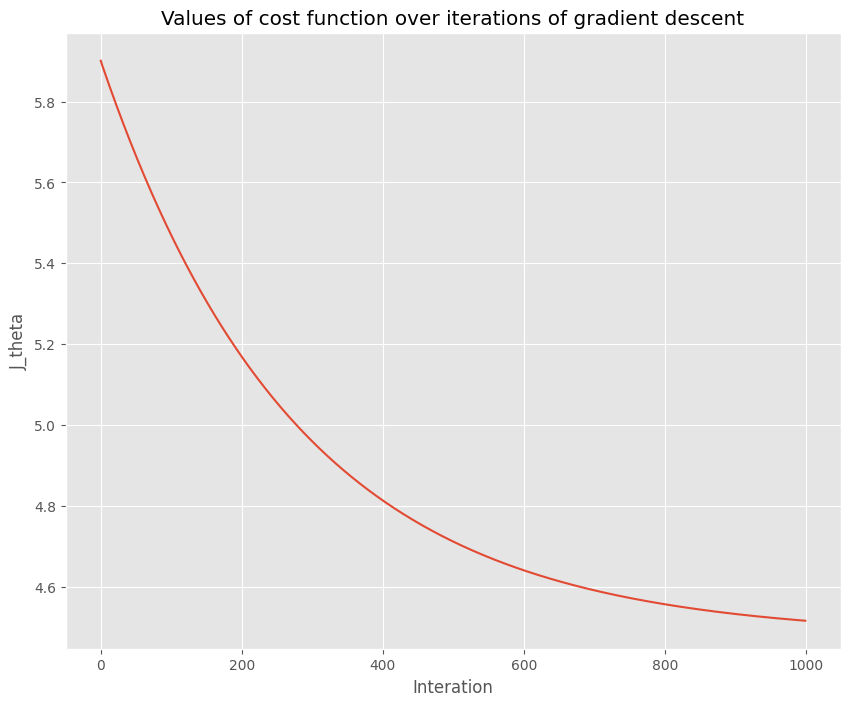

In [26]:
plt.plot(cost)
plt.xlabel("Interation")
plt.ylabel("J_theta")
plt.title("Values of cost function over iterations of gradient descent")

In [27]:
theta.shape

(2, 1)

In [19]:
def predict(x,theta):
  y_pred = np.dot(theta.transpose(),x)
  return y_pred

In [35]:
y_pred_1 = predict(np.array([1,4]),theta)*100000
print(y_pred_1)

126636.4789703756


In [34]:
y_pred_2 = predict(np.array([1, 8.3]), theta)*10000
y_pred_2

61147.480557494324

In [28]:
theta

array([[-3.24375918],
       [ 1.12753099]])

In [30]:
import seaborn as sns

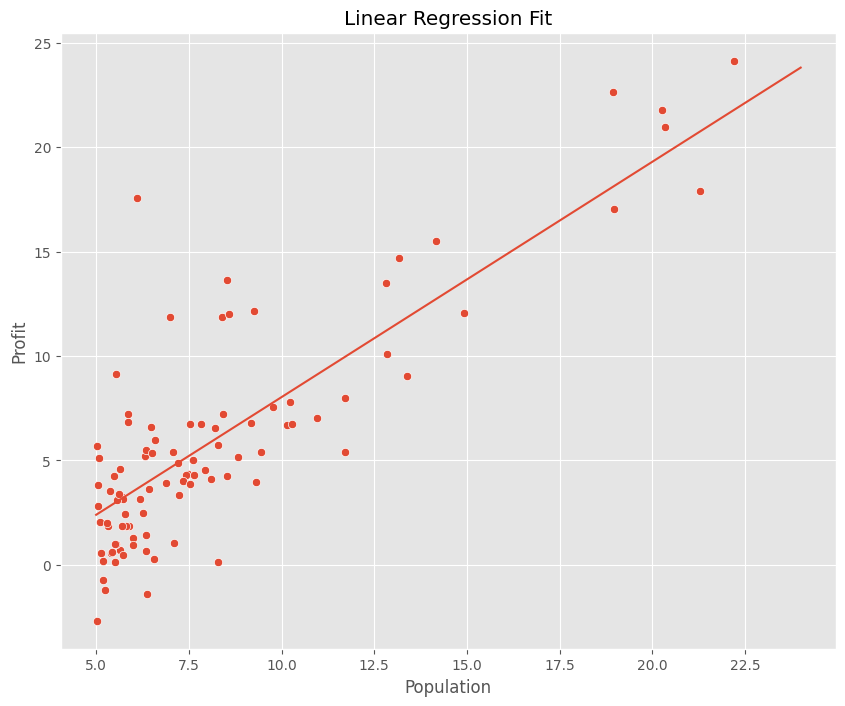

In [32]:
theta = np.squeeze(theta)
sns.scatterplot(x="Population", y="Profit", data=data)
x_values = np.arange(5, 25)
y_values = theta[0] + theta[1] * x_values
sns.lineplot(x=x_values, y=y_values)

plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Linear Regression Fit")
plt.show()

Split Dataset into Training and Testing dataset

In [37]:
from sklearn.model_selection import train_test_split
X=data.drop("Profit",axis=1)
y=data["Profit"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [39]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [42]:
reg.score(X_test,y_test)

0.6688557540741457

In [43]:
reg.score(X_train,y_train)

0.7193323954664781

Here as we can see the score for training data is more when compared to testing data, the model overfits

Lasso & Ridge Regularization

In [44]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=0.1, max_iter=1000, tol=0.1)
lasso_reg.fit(X_test,y_test)

Lasso(alpha=0.1, tol=0.1)

In [45]:
lasso_reg.score(X_test,y_test)

0.6888014595673204

In [46]:
lasso_reg.score(X_train,y_train)

0.6914310168751615

In [47]:
ridge_reg=linear_model.Ridge(alpha=8, max_iter=1000,tol=0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=8, max_iter=1000, tol=0.1)

In [48]:
ridge_reg.score(X_train,y_train)

0.7192881785947994

In [49]:
ridge_reg.score(X_test,y_test)

0.6673167844281542

Working with housing dataset

In [50]:
df = pd.read_csv('Housing.csv')

In [51]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [52]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [54]:
df.describe

<bound method NDFrame.describe of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       

In [64]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1=df

In [65]:
df1['mainroad']= label_encoder.fit_transform(df1['mainroad'])
df1['guestroom']= label_encoder.fit_transform(df1['guestroom'])
df1['basement']= label_encoder.fit_transform(df1['basement'])
df1['hotwaterheating']= label_encoder.fit_transform(df1['hotwaterheating'])
df1['airconditioning']= label_encoder.fit_transform(df1['airconditioning'])
df1['prefarea']= label_encoder.fit_transform(df1['prefarea'])
df1['furnishingstatus']= label_encoder.fit_transform(df1['furnishingstatus'])


In [66]:
from sklearn.model_selection import train_test_split
X=df1.drop("price",axis=1)
y=df1["price"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=61)

In [68]:
model = LinearRegression()
model.fit(X_train,y_train)
LinearRegression()
print("Train Score",model.score(X_train,y_train))
print("Test Score",model.score(X_test,y_test))

Train Score 0.6956598054929441
Test Score 0.6347666133990619


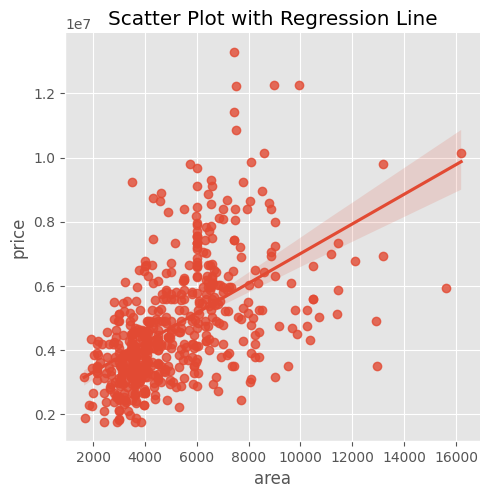

In [78]:
sns.lmplot(x='area', y='price', data=df)
plt.title('Scatter Plot with Regression Line')
plt.show()

In [80]:
from sklearn.linear_model import Ridge
ridgemodel=Ridge(alpha=50,max_iter=100,tol=0.1)
ridgemodel.fit(X_train,y_train)
Ridge(alpha=50, max_iter=100, tol=0.1)
print("Train Score",ridgemodel.score(X_train,y_train))
print("Test Score",ridgemodel.score(X_test,y_test))

Train Score 0.6640272697415742
Test Score 0.6187173549628355


In [82]:
from sklearn.linear_model import Lasso
lassomodel=Lasso(alpha=50,max_iter=100,tol=0.1)
lassomodel.fit(X_train,y_train)
Lasso(alpha=50, max_iter=100, tol=0.1)
print("Train Score",lassomodel.score(X_train,y_train))
print("Test Score",lassomodel.score(X_test,y_test))

Train Score 0.6956597716909441
Test Score 0.6347848125907534


Sine Wave with noise


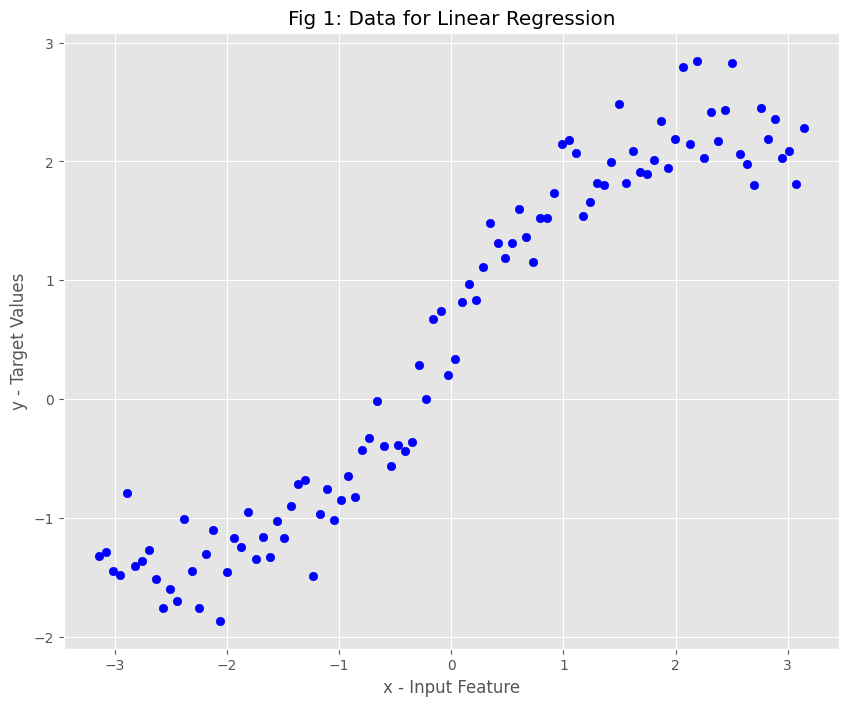

In [84]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5 * x + np.sin(x) + np.random.random(x.shape)

plt.scatter(x, y, color='blue')
plt.xlabel('x - Input Feature')
plt.ylabel('y - Target Values')
plt.title('Fig 1: Data for Linear Regression')
plt.show()

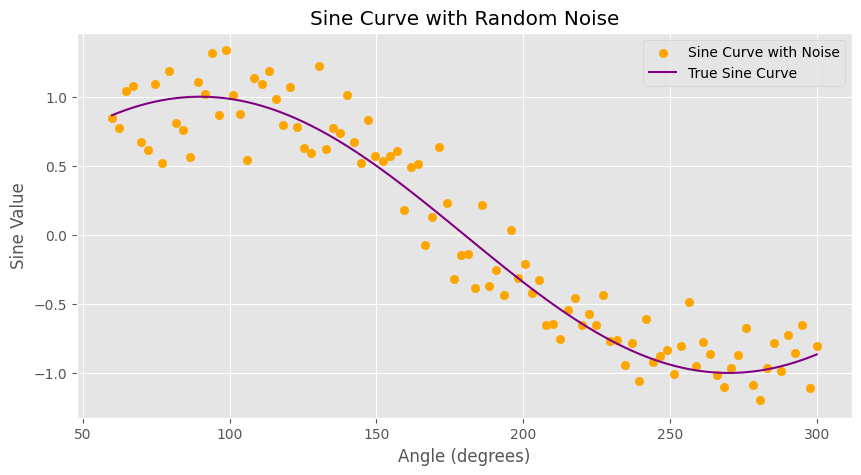

In [88]:
angles = np.linspace(60, 300, 100)
sine_values = np.sin(np.radians(angles))
noise = np.random.normal(0, 0.2, len(angles))
sine_values_with_noise = sine_values + noise
plt.figure(figsize=(10, 5))
plt.scatter(angles, sine_values_with_noise, label='Sine Curve with Noise', color='orange')
plt.plot(angles, sine_values, label='True Sine Curve', color='Purple')
plt.title('Sine Curve with Random Noise')
plt.xlabel('Angle (degrees)')
plt.ylabel('Sine Value')
plt.legend()
plt.grid(True)
plt.show()